In [2]:
import praw
from IPython import display
import math
from pprint import pprint
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid', context='talk', palette='Dark2')


In [3]:
import nltk
nltk.downloader.download('vader_lexicon')
nltk.download('stopwords')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/rupakulasaiabhishek/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rupakulasaiabhishek/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Using Reddit API

In [279]:
reddit = praw.Reddit(client_id='RpfHZnU4x7z5ow', client_secret='bAiBgHXu-9OAIlAmuLx0eDkFvQ0', user_agent='Reddit_Scrapping')



In [175]:
post = set()
#Select a subreddit and also search a keyword in the subreddit 
for submission in reddit.subreddit('teslamotors').search('cybertruck'):
    post.add(submission.title)
    display.clear_output()
    print(len(post))


100


<b>  Sentiment Analysis using the data </b>

In [176]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

sia = SIA()
results = []

for line in post:
    pol_score = sia.polarity_scores(line)
    pol_score['post'] = line
    results.append(pol_score)

In [177]:
df = pd.DataFrame.from_records(results)
df.head()

,neg,neu,pos,compound,post
0,0.203,0.693,0.104,-0.2516,Forget the Cybertruck: This is the most import...
1,0.000,1.000,0.000,0.0000,Cybertruck Malibu full video
2,0.000,1.000,0.000,0.0000,Elon - Tesla 2 person electric ATV will come a...
3,0.197,0.803,0.000,-0.4019,Doug Demuro responds to the arguments raised f...
4,0.000,1.000,0.000,0.0000,Cybertruck unveil on Nov 21 in LA near SpaceX ...


In [178]:
df.loc[df['neg'].idxmax()]
#k=df.post[df['neg']<-]
#k=df['post']
#k.iloc[0]

neg                                           0.242
neu                                           0.758
pos                                               0
compound                                    -0.1513
post        A very serious cfd effort on Cybertruck
Name: 5, dtype: object

In [179]:
df = pd.DataFrame.from_records(results)

df['label'] = 0
df.loc[df['compound'] > 0.3 , 'label'] = 1
df.loc[(df['compound'] > 0.05) & (df['compound'] <=0.3) , 'label'] = 0.5
df.loc[df['compound'] < -0.1, 'label'] = -1
df.head()

,neg,neu,pos,compound,post,label
0,0.203,0.693,0.104,-0.2516,Forget the Cybertruck: This is the most import...,-1.0
1,0.000,1.000,0.000,0.0000,Cybertruck Malibu full video,0.0
2,0.000,1.000,0.000,0.0000,Elon - Tesla 2 person electric ATV will come a...,0.0
3,0.197,0.803,0.000,-0.4019,Doug Demuro responds to the arguments raised f...,-1.0
4,0.000,1.000,0.000,0.0000,Cybertruck unveil on Nov 21 in LA near SpaceX ...,0.0


In [180]:
k=df.loc[df['label']== -1]
k.iloc[7]

neg                                                     0.155
neu                                                     0.845
pos                                                         0
compound                                               -0.296
post        Elon teases Cybertruck as possible SpaceX Star...
label                                                      -1
Name: 64, dtype: object

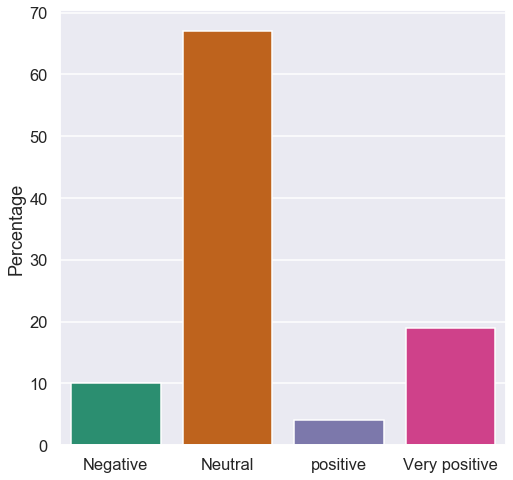

In [181]:
fig, ax = plt.subplots(figsize=(8, 8))

counts = df.label.value_counts(normalize=True) * 100

sns.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(['Negative', 'Neutral', 'positive','Very positive'])
ax.set_ylabel("Percentage")

plt.show()

In [182]:
counts

 0.0    67.0
 1.0    19.0
-1.0    10.0
 0.5     4.0
Name: label, dtype: float64

Text(0.5, 1.0, 'r/teslamotors')

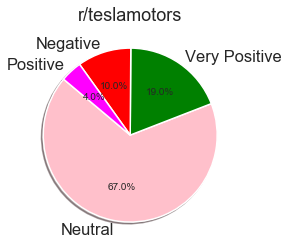

In [183]:
counts = df.label.value_counts(normalize=True) * 100
labels = 'Neutral', 'Very Positive','Negative','Positive'
colors = ['pink', 'green', 'Red','magenta']
explode = (1, 1, 0, 0)  # explode 1st slice

plt.pie(counts, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("r/teslamotors")

In [184]:
def process_text(post):
    tokens = []
    for line in post:
        toks = tokenizer.tokenize(line)
        toks = [t.lower() for t in toks if t.lower() not in stop_words]
        tokens.extend(toks)
    
    return tokens

In [185]:
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords
tokenizer = RegexpTokenizer(r'\w+')
stop_words = stopwords.words('english')



In [186]:
pos_lines = list(df[df.label == 1].post)

pos_tokens = process_text(pos_lines)
pos_freq = nltk.FreqDist(pos_tokens)

pos_freq.most_common(20)

[('cybertruck', 18),
 ('tesla', 5),
 ('truck', 3),
 ('elon', 3),
 ('reservation', 3),
 ('like', 3),
 ('vehicle', 3),
 ('real', 2),
 ('production', 2),
 ('please', 2),
 ('would', 2),
 ('mod', 2),
 ('think', 2),
 ('really', 2),
 ('one', 2),
 ('put', 2),
 ('numbers', 2),
 ('adorable', 1),
 ('mini', 1),
 ('time', 1)]

In [187]:
neg_lines = list(df[df.label == -1].post)

neg_tokens = process_text(neg_lines)
neg_freq = nltk.FreqDist(neg_tokens)

neg_freq.most_common(20)

[('cybertruck', 10),
 ('tesla', 6),
 ('truck', 3),
 ('one', 2),
 ('elon', 2),
 ('atv', 2),
 ('electric', 2),
 ('bikes', 2),
 ('easter', 2),
 ('egg', 2),
 ('forget', 1),
 ('important', 1),
 ('product', 1),
 ('talking', 1),
 ('insurance', 1),
 ('doug', 1),
 ('demuro', 1),
 ('responds', 1),
 ('arguments', 1),
 ('raised', 1)]